<a href="https://colab.research.google.com/github/nicolegherrera/Github-Class/blob/main/decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import numpy as np;
import pandas as pd

from timeit import default_timer

from sklearn.model_selection import train_test_split

# Decision Tree

## Intuition

This type of model represents the algorithm in the form of a tree where each attribute value selection rule is a node that branches into the possible values.

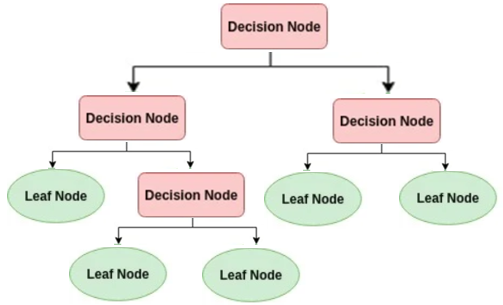

Example:

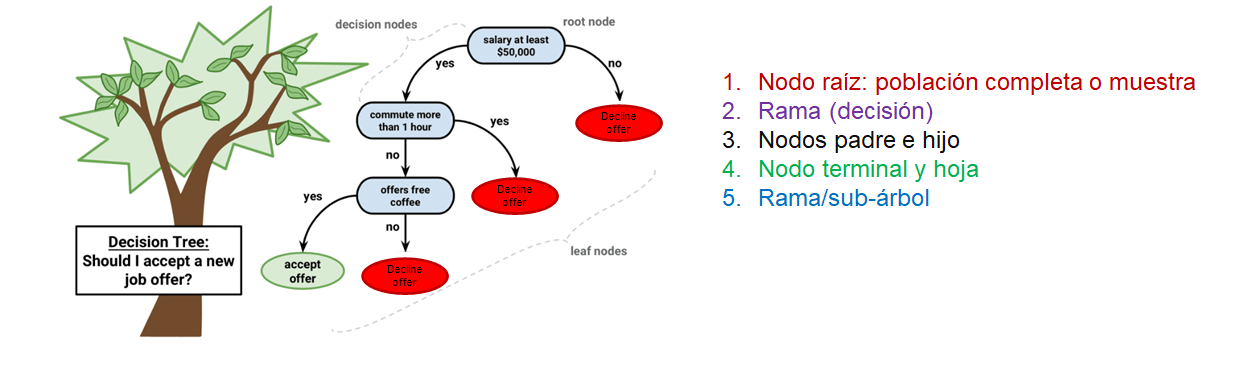

Predicted value for a particular instance is the mode of the leaf node corresponding to that instance values, i.e. if in the training dataset the set of instances that fall in particular leaf node is for example:

- 60% class A.
- 40% class B.

That leaf node will be assigned prediction class A. Therefore, once predicting a new instance (validation, test, etc.) that fulfill the attribute values corresponding to that leaf node, the prediction for that observation will be class A (with a probability of 0.6).

## Key Hyperparameters

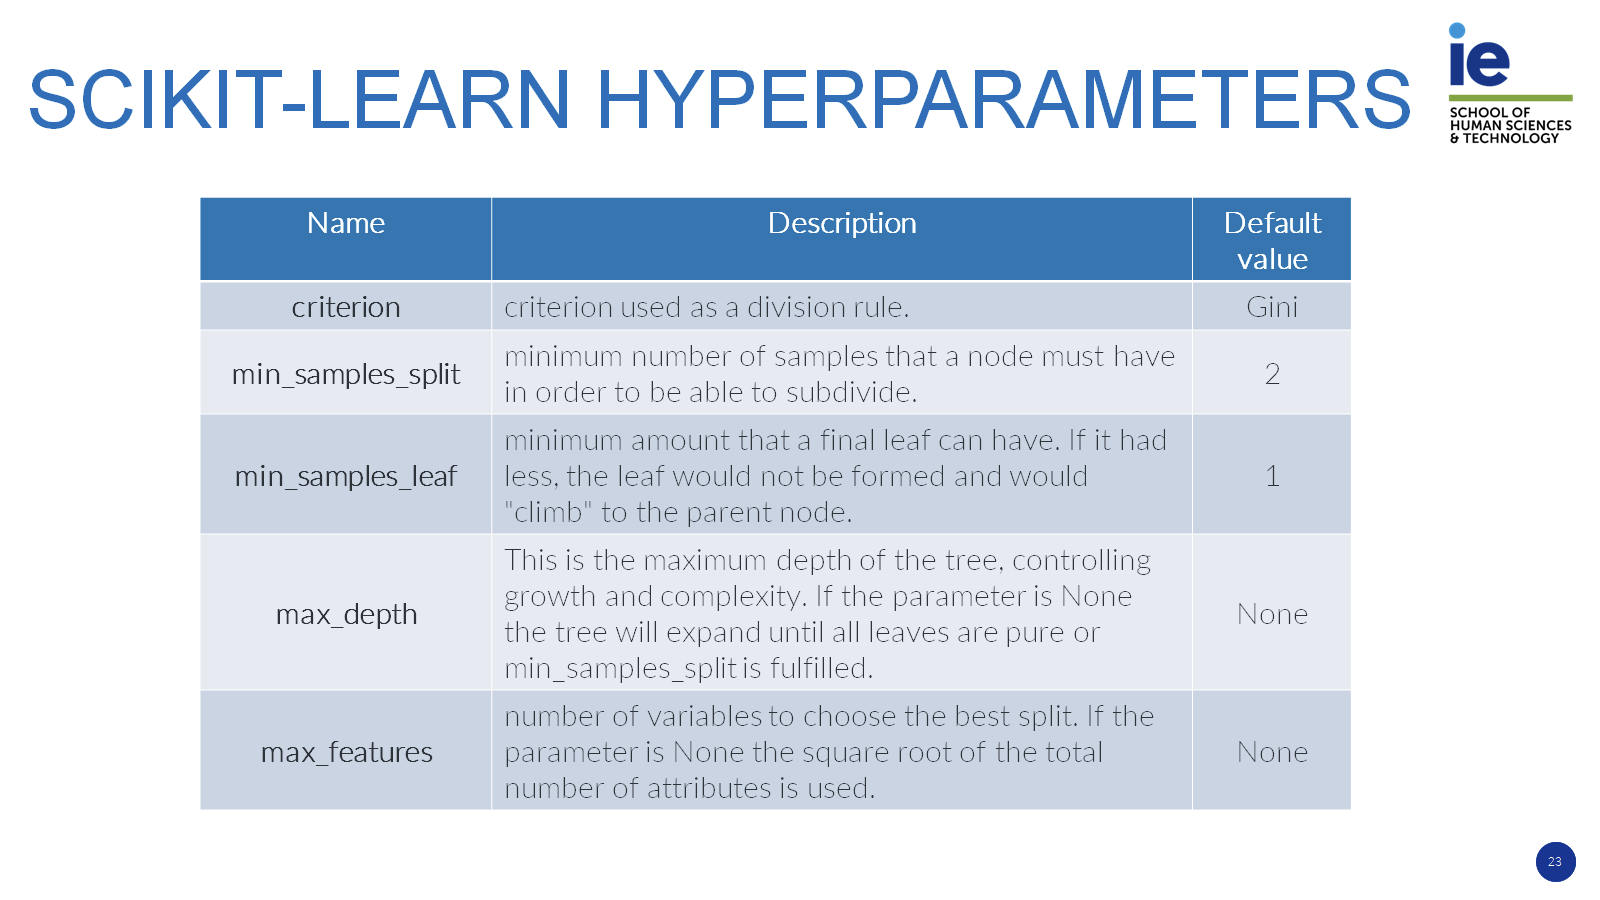

## Data

You already know it is going to be iris...

In [ ]:
from sklearn.datasets import load_iris as load_data;

In [ ]:
data = load_data();
X = data.data;
y = data.target;

In [ ]:
perc_values = [0.7, 0.15, 0.15];
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, stratify = y, test_size=perc_values[1] + perc_values[2], random_state=1);
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, stratify = y_valtest, test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)

## Grid Search

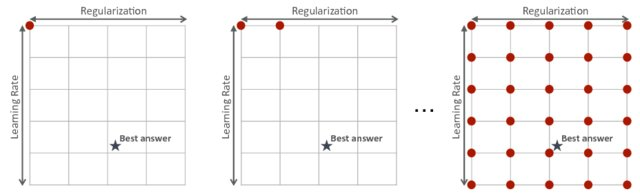

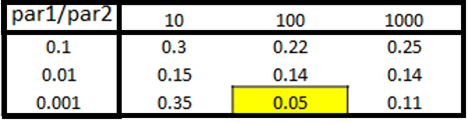

We will use decision trees as model.

```
# Tiene formato de código
```



In [ ]:
# [1] Import model
from sklearn.tree import DecisionTreeClassifier as model_constructor
?model_constructor

We will be using **AUC** as evaluation metric. This is a multiclass problem so we have to use the *multi_class* argument.

In [ ]:
# 2) Import metric
from sklearn.metrics import roc_auc_score as metric

In [ ]:
?metric

Let's define the grid we will be using.

In [ ]:
criterion_values = ['gini', 'entropy']
max_depth_values = [None, 6, 20];
min_samples_split_values = [2, 5, 20];
min_samples_leaf_values = [1, 5, 20];
max_features_values = [None, 1, 2];

params_grid = {  'criterion': criterion_values,
                 'max_depth': max_depth_values,
                 'min_samples_split': min_samples_split_values,
                 'min_samples_leaf': min_samples_leaf_values,
                 'max_features': max_features_values}

Get total number of combinations.

In [ ]:
n = len(params_grid['max_depth'])*len(params_grid['min_samples_split'])*len(params_grid['min_samples_leaf'])*len(params_grid['max_features'])*len(params_grid['criterion'])
print(str(n)+ ' iterations of Decision Tree')

162 iterations of Decision Tree


### Using a Fixed Validation Set

In [ ]:
num_iter = 1;
grid_results = pd.DataFrame(columns = ('criterion',
                                       'max_depth',
                                       'min_samples_split',
                                       'min_samples_leaf',
                                       'max_features',
                                       'auc_train',
                                       'auc_val',
                                       'time'))

for criterion in params_grid['criterion']:
    for max_depth in params_grid['max_depth']:
        for min_samples_split in params_grid['min_samples_split']:
            for min_samples_leaf in params_grid['min_samples_leaf']:
                for max_features in params_grid['max_features']:


                    # Start time
                    start_time = default_timer()

                    # Print trace
                    print('Iteracion = ' + str(num_iter))

                    # [3] Define model
                    model = model_constructor(criterion = criterion,
                                              max_depth = max_depth,
                                              min_samples_split = min_samples_split,
                                              min_samples_leaf = min_samples_leaf,
                                              max_features = max_features,
                                              random_state = 0)

                    # [4] Train model
                    model.fit(X_train, y_train)

                    # [5] Predict
                    pred_train = model.predict_proba(X_train) # predict_proba!
                    pred_val = model.predict_proba(X_val) # predict_proba!

                    # [6] Evaluate
                    metric_train = metric(y_train, pred_train, multi_class = 'ovr')
                    metric_val = metric(y_val, pred_val, multi_class = 'ovr')

                    # Computational time
                    time = default_timer() - start_time

                    # print error
                    print('AUC train = %.2f - AUC validation = %.2f. Time spend = %.2f.'
                          % (metric_train, metric_val, time))

                    # Save iteration results
                    grid_results.loc[num_iter]=[criterion,
                                                max_depth,
                                                min_samples_split,
                                                min_samples_leaf,
                                                max_features,
                                             metric_train,
                                             metric_val,
                                            time]
                    num_iter += 1

print('Grid Search Total Computational Time: ', np.sum(grid_results.time.values))

Iteracion = 1
AUC train = 1.00 - AUC validation = 1.00. Time spend = 0.01.
Iteracion = 2
AUC train = 1.00 - AUC validation = 0.97. Time spend = 0.01.
Iteracion = 3
AUC train = 1.00 - AUC validation = 1.00. Time spend = 0.01.
Iteracion = 4
AUC train = 1.00 - AUC validation = 1.00. Time spend = 0.01.
Iteracion = 5
AUC train = 0.97 - AUC validation = 0.91. Time spend = 0.01.
Iteracion = 6
AUC train = 1.00 - AUC validation = 1.00. Time spend = 0.01.
Iteracion = 7
AUC train = 0.99 - AUC validation = 1.00. Time spend = 0.01.
Iteracion = 8
AUC train = 0.89 - AUC validation = 0.92. Time spend = 0.01.
Iteracion = 9
AUC train = 0.98 - AUC validation = 1.00. Time spend = 0.00.
Iteracion = 10
AUC train = 1.00 - AUC validation = 1.00. Time spend = 0.00.
Iteracion = 11
AUC train = 1.00 - AUC validation = 0.93. Time spend = 0.00.
Iteracion = 12
AUC train = 1.00 - AUC validation = 1.00. Time spend = 0.01.
Iteracion = 13
AUC train = 1.00 - AUC validation = 1.00. Time spend = 0.00.
Iteracion = 14
AUC tr

Check results

In [ ]:
grid_results

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,auc_train,auc_val,time
1,gini,None,2,1,None,1.000000,1.000000,0.012082
2,gini,None,2,1,1,1.000000,0.968056,0.005905
3,gini,None,2,1,2,1.000000,1.000000,0.006184
4,gini,None,2,5,None,0.996190,1.000000,0.005764
5,gini,None,2,5,1,0.971429,0.914385,0.007429
...,...,...,...,...,...,...,...,...
158,entropy,20,20,5,1,0.966259,0.936607,0.004761
159,entropy,20,20,5,2,0.991293,1.000000,0.004820
160,entropy,20,20,20,None,0.989796,1.000000,0.004572
161,entropy,20,20,20,1,0.894558,0.920040,0.004624


**Which one is the winner?**

In [ ]:
grid_results = grid_results.sort_values(by = ['auc_val', 'auc_train', 'time'], ascending = [False, False, True])
grid_results

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,auc_train,auc_val,time
57,gini,20,2,1,2,1.000000,1.000000,0.005020
82,entropy,None,2,1,None,1.000000,1.000000,0.005103
30,gini,6,2,1,2,1.000000,1.000000,0.005168
28,gini,6,2,1,None,1.000000,1.000000,0.005171
55,gini,20,2,1,None,1.000000,1.000000,0.005249
...,...,...,...,...,...,...,...,...
59,gini,20,2,5,1,0.971429,0.914385,0.005451
113,entropy,6,2,5,1,0.971429,0.914385,0.005516
95,entropy,None,5,5,1,0.971429,0.914385,0.005734
122,entropy,6,5,5,1,0.971429,0.914385,0.007273


In [ ]:
best_model = grid_results.iloc[0]
best_model

criterion               gini
max_depth                 20
min_samples_split          2
min_samples_leaf           1
max_features               2
auc_train                1.0
auc_val                  1.0
time                 0.00502
Name: 57, dtype: object

### Using Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
?GridSearchCV

In [ ]:
# Define grid
grid_cv = GridSearchCV(model_constructor(),
                     param_grid=params_grid,
                     n_jobs=2, ## Paralellization!
                     cv = 5,
                     scoring = 'roc_auc_ovr') # Number of folds

In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In this case, we do not need a fixed validation set, so we will combine train and validation.

In [ ]:
# Run grid
start_time = default_timer()

grid_cv.fit(np.concatenate((X_train, X_val), axis = 0), np.concatenate((y_train, y_val), axis = 0))

stop_time = default_timer()
print('CV Grid Search Total Computational Time: : ', stop_time - start_time)

CV Grid Search Total Computational Time: :  1.8929108400000132


In [ ]:
grid_cv.best_score_

0.9936472663139331

In [ ]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

Different result than the obtained using a fixed validation set.

In [ ]:
best_model

criterion               gini
max_depth                 20
min_samples_split          2
min_samples_leaf           1
max_features               2
auc_train                1.0
auc_val                  1.0
time                 0.00502
Name: 57, dtype: object

## Final Model

Validation has served its purpose, let's combine it with train to get more training data.

In [ ]:
print('Old train data size = ' + str(X_train.shape))
print('Old train target size = ' + str(y_train.shape))

# Combine train and validación
X_train = np.concatenate((X_train, X_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)

print('New train data size = ' + str(X_train.shape))
print('New train target size = ' + str(y_train.shape))

Old train data size = (127, 4)
Old train target size = (127,)
New train data size = (149, 4)
New train target size = (149,)


Let's first use the default model.

In [ ]:
# [3] Define model
model = model_constructor(random_state = 0) # Use same random_state as in training!!!

# [4] Train model
model.fit(X_train, y_train)

# [5] Predict
pred_train = model.predict_proba(X_train)
pred_test = model.predict_proba(X_test)

# [6] Compute metric
metric_train = metric(y_train, pred_train, multi_class = 'ovr')
metric_test = metric(y_test, pred_test, multi_class = 'ovr')


In [ ]:
# print error
print('AUC train = %.2f - AUC test = %.2f'
      % (metric_train, metric_test))

AUC train = 1.00 - AUC test = 0.97


Now the model optimized using a fixed validation set.

In [ ]:
# [3] Define model
model = model_constructor(criterion = best_model.criterion,
                          max_depth = best_model.max_depth,
                          min_samples_split = best_model.min_samples_split,
                          min_samples_leaf = best_model.min_samples_leaf,
                          max_features = best_model.max_features,
                          random_state = 0) # Use same random_state as in training!!!

# [4] Train model
model.fit(X_train, y_train)

# [5] Predict
pred_train = model.predict_proba(X_train)
pred_test = model.predict_proba(X_test)

# [6] Compute metric
metric_train = metric(y_train, pred_train, multi_class = 'ovr')
metric_test = metric(y_test, pred_test, multi_class = 'ovr')



In [ ]:
# print error
print('AUC train = %.2f - AUC test = %.2f'
      % (metric_train, metric_test))

AUC train = 1.00 - AUC test = 0.97


And finally the model optimized with CV.

In [ ]:
# [3] Define model
model = model_constructor(criterion = grid_cv.best_params_['criterion'],
                          max_depth = grid_cv.best_params_['max_depth'],
                          min_samples_split = grid_cv.best_params_['min_samples_split'],
                          min_samples_leaf = grid_cv.best_params_['min_samples_leaf'],
                          max_features = grid_cv.best_params_['max_features'],
                          random_state = 0) # Use same random_state as in training!!!

# [4] Train model
model.fit(X_train, y_train)

# [5] Predict
pred_train = model.predict_proba(X_train)
pred_test = model.predict_proba(X_test)

# [6] Compute metric
metric_train = metric(y_train, pred_train, multi_class = 'ovr')
metric_test = metric(y_test, pred_test, multi_class = 'ovr')


In [ ]:
# print error
print('AUC train = %.2f - AUC test = %.2f'
      % (metric_train, metric_test))

AUC train = 0.99 - AUC test = 0.96


In real-world problems you will see bigger differences!